# **Naive Bayes**

**Q1. Using the Naive Bayes Classifiers classify potential customers who are more likely to purchase a loan by the Bank_Personal_Loan_Modelling dataset**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset from Excel file
data = pd.read_excel('/content/drive/MyDrive/Bank_Personal_Loan_Modelling.xlsx','Data')
data.head

# Preprocess data
# Remove ID and Zip code columns as they don't contribute to the prediction
data = data.drop(columns=['ID', 'ZIP Code'])

# Split dataset into features and target variable
X = data.drop(columns=['Personal Loan'])
y = data['Personal Loan']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)







GaussianNB()

**Q2. Do the performance analysis of the above model using precision, recall and F1-score. **

In [2]:
# Evaluate model performance
y_pred = classifier.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.49612403100775193
Recall: 0.6095238095238096
F1 Score: 0.547008547008547


**Q3. Plot the distribution of the input features.**

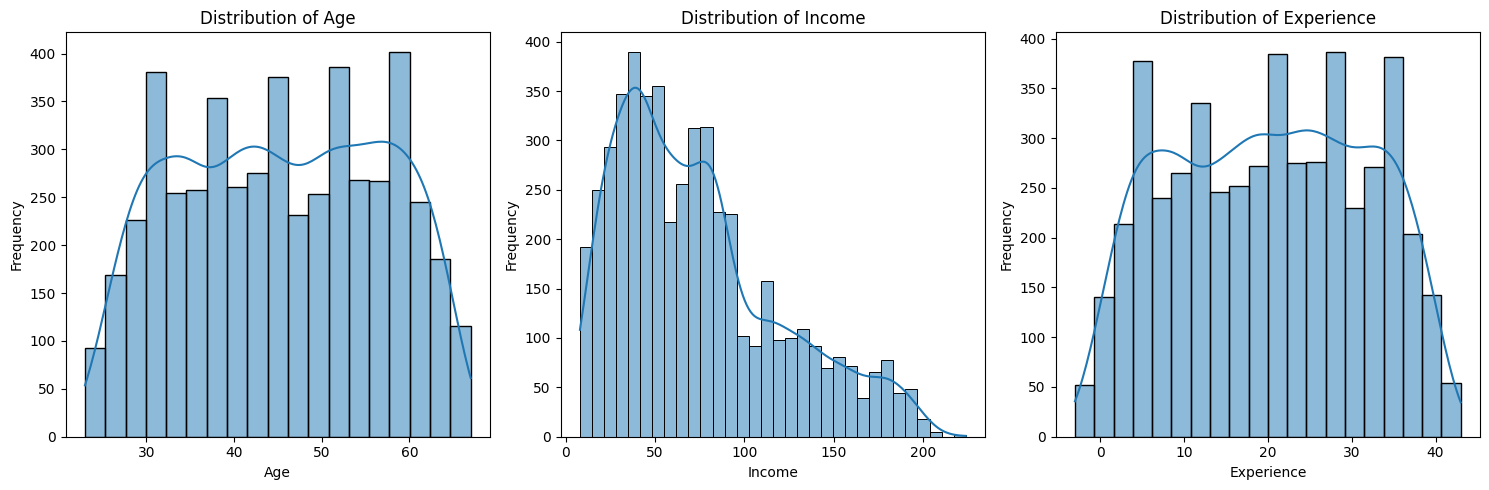

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select input features
features = ['Age', 'Income', 'Experience']

# Plot distributions
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
# Preprocess data
X = data[['Age', 'Income', 'Experience']]
y = data['Personal Loan']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [17]:
# making predictions on the testing set
y_pred = classifier.predict(X_test)

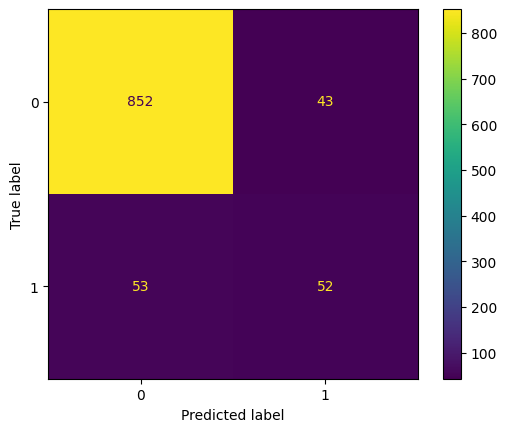

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test,y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Iris-Setosa", "iris-Versicolor","Iris-Virginica"])
disp.plot()

plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       905
           1       0.50      0.55      0.52        95

    accuracy                           0.90      1000
   macro avg       0.72      0.74      0.73      1000
weighted avg       0.91      0.90      0.91      1000



**Q4. Using this Bayesian classifier, make a function which takes input as Age, Income and Education . Output: Predict whether loan will be given or not.**

In [20]:

# Function to predict loan given Age, Income, and Education
def predict_loan(age, income, experience):
    input_data = pd.DataFrame({'Age': [age], 'Income': [income], 'Experience': [experience]})
    prediction = classifier.predict(input_data)
    if prediction[0] == 1:
        return "Potential Customer, Loan will be given"
    else:
        return "Not likely a potential customer"

In [21]:
features = ['Age', 'Income', 'Experience']
target = 'Personal Loan'
feature_values = []
print("Enter value to predict for..")
for f in features:
    print(f,": ")
    feature_values.append(input())

# Example usage
predicted_result = predict_loan(feature_values[0], feature_values[1], feature_values[2])
print(predicted_result)

Enter value to predict for..
Age : 
35
Income : 
25000
Experience : 
19
Not likely a potential customer
